In [1]:
from edc import print_info
print_info("geodb-explore")


***Notebook Title***  
GeoDB: Explore Datasets

***Notebook Description***  
Euro Data Cube GeoDB: Explore Datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC GeoDB


In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`
* `SH_CLIENT_ID`, `SH_CLIENT_NAME`, `SH_CLIENT_SECRET`, `SH_INSTANCE_ID`
* `XCUBE_GEN_API_SERVER_PORT`, `XCUBE_GEN_API_SERVER_URL`, `XCUBE_GEN_API_USER_NAME`, `XCUBE_GEN_AUTH_AUD`, `XCUBE_GEN_AUTH_CLIENT_ID`, `XCUBE_GEN_AUTH_CLIENT_SECRET`, `XCUBE_GEN_AUTH_DOMAIN`

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_ACCESS_KEY_ID`, `AWS_BUCKET`, `AWS_SECRET_ACCESS_KEY`
* `DAPA_URL`


In [3]:
from edc import check_compatibility
check_compatibility("user-0.19.6")

This notebook is compatible with this base image version (user-0.19.6).

## Exploring Data




In [1]:
from xcube_geodb.core.geodb import GeoDBClient

In [2]:
geodb = GeoDBClient()

### Get your user name

In [3]:
geodb.whoami

'geodb_admin'

### List Datasets

__Step 1__: List all datasets a user has access to.

In [4]:
geodb.get_my_usage() # to be updated so that all available collections are displayed includign sensible information ont heir availability, e.g. public, purchased, etc..

{'usage': '332 MB'}

In [5]:
geodb.get_my_collections()

,table_name
0,land_polygons


__Step 2__: Let's get the whole content of a particular data set.

In [6]:
gdf = geodb.get_collection('land_use') # to be updated, so that namespace is not needed or something more suitable, e.g. 'public'
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,2,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((453810.376 91150.199, 453812.552 911...",4770325,1300,2019-03-26
2,3,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((456099.635 97696.070, 456112.810 976...",2305689,7000,2019-02-25
3,4,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
4,5,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
...,...,...,...,...,...,...,...
9822,9823,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((460637.334 96865.891, 460647.927 969...",6253989,1600,2019-03-08
9823,9824,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((459467.868 96839.686, 459467.770 968...",6252044,1600,2019-03-26
9824,9825,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((459488.998 94066.248, 459498.145 940...",6245985,2000,2019-04-08
9825,9826,2020-08-21T11:45:29.012315+00:00,None,"POLYGON ((459676.680 94000.000, 459672.469 939...",6245986,2000,2019-02-20


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

<AxesSubplot:>

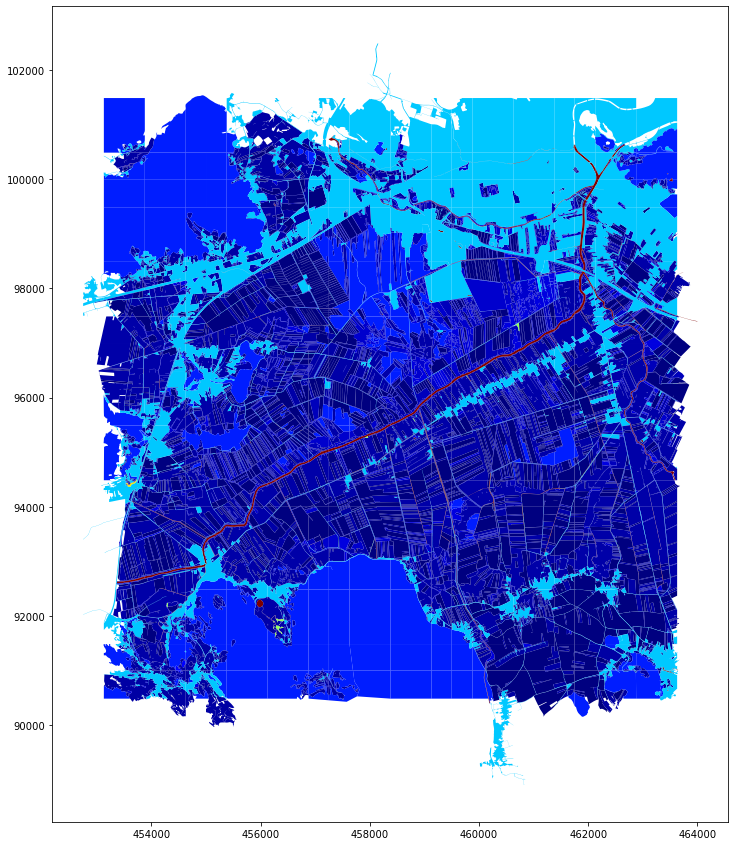

In [7]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

In [8]:
gdfsub = geodb.get_collection('land_use', database='geodb_test99', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


<AxesSubplot:>

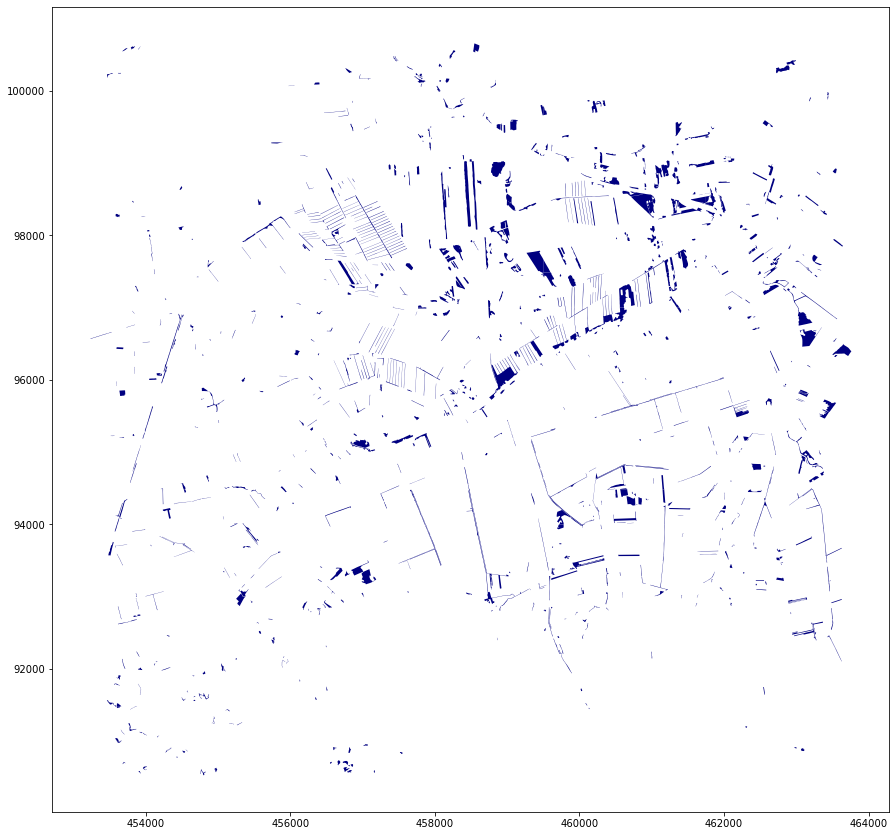

In [9]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 6__: Filter by bbox, limit it to 200 entries

In [10]:
gdf = geodb.get_collection_by_bbox(collection="land_use", database='geodb_test99', bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,12,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
1,13,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
2,14,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
3,15,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
4,16,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((461439.703 92137.401, 461436.166 921...",4643632,1600,2019-02-21
...,...,...,...,...,...,...,...
195,215,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458934.146 95656.658, 458932.345 956...",5966575,1222,2019-01-05
196,216,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458934.146 95656.658, 458935.525 956...",5966577,1100,2019-01-05
197,217,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455301.879 91279.877, 455302.373 912...",2594677,1100,2019-03-14
198,218,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455207.927 91222.221, 455193.596 912...",2594678,1100,2019-03-14


<AxesSubplot:>

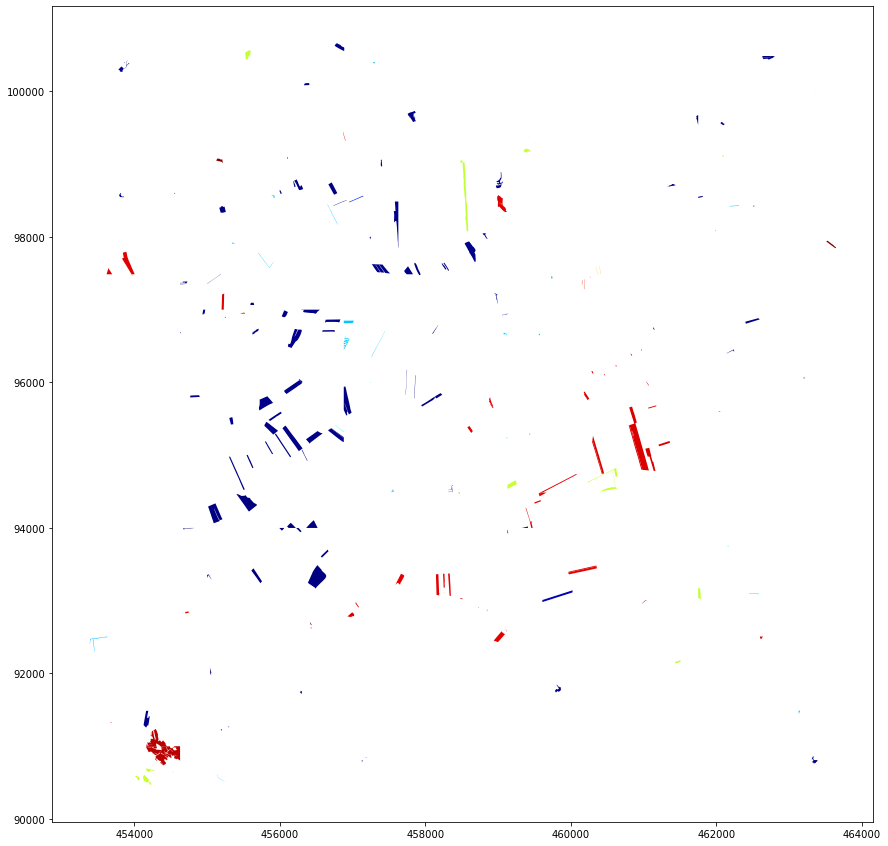

In [11]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [ ]:
gdf = geodb.get_collection_pg(collection='land_use', database='geodb_test99', where='raba_id=1410')
gdf.head()

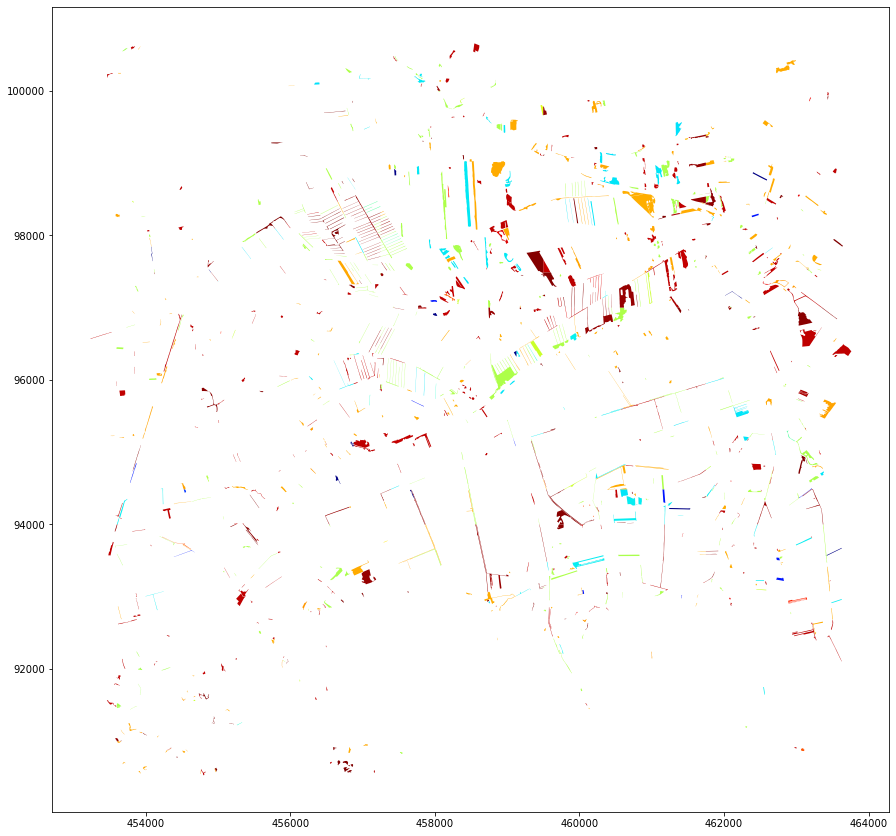

In [15]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [16]:
df = geodb.get_collection_pg('land_use', database='geodb_test99', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
